# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
lat = sinasc_raw[['PARIDADE', 'CONSULTAS', 'munResLat']].copy()
lat.head()

,PARIDADE,CONSULTAS,munResLat
0,0,4,-11.93554
1,1,4,-11.93554
2,1,4,-11.93554
3,0,3,-12.13178
4,1,4,-11.93554


In [5]:
lat['LATITUDE'] = pd.cut(lat['munResLat'], [-20, -10.5, 0], labels=['Abaixo de -10.5', 'Acima de -10.5'])
# lat.pivot_table(['CONSULTAS', 'PARIDADE'], ['munResLat', latitude], observed=True)
lat.groupby(['LATITUDE'], observed=False).aggregate('count')

,PARIDADE,CONSULTAS,munResLat
LATITUDE,,,
Abaixo de -10.5,12993,12993,12993
Acima de -10.5,14034,14034,14034


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
lat['LATITUDE'] = pd.cut(lat['munResLat'], [-20, -10.5, 0], labels=['Abaixo de -10.5', 'Acima de -10.5'])
# lat.pivot_table(['CONSULTAS', 'PARIDADE'], ['munResLat', latitude], observed=True)
lat.groupby(['LATITUDE'], observed=False).aggregate({
    'PARIDADE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

PARIDADE                                               \
                     sum      mean min max median       std       var   
LATITUDE                                                                
Abaixo de -10.5     8466  0.651582   0   1    1.0  0.476488  0.227040   
Acima de -10.5      9068  0.646145   0   1    1.0  0.478182  0.228658   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
LATITUDE                                                                
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928  
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
area = sinasc_raw[['munResArea', 'HORANASC', 'KOTELCHUCK']].copy()
area.head()

,munResArea,HORANASC,KOTELCHUCK
0,7067.025,1620.0,5
1,7067.025,1830.0,5
2,7067.025,915.0,5
3,3958.273,835.0,4
4,7067.025,750.0,5


In [8]:
area['AREA'] = pd.cut(area['munResArea'], [0, 3000, 999999], labels=['Abaixo de 3000', 'Acima de 3000'])
# lat.pivot_table(['CONSULTAS', 'PARIDADE'], ['munResLat', latitude], observed=True)
area.groupby(['AREA'], observed=False).aggregate({
    'HORANASC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

HORANASC                                                \
                       sum         mean  min     max  median         std   
AREA                                                                       
Abaixo de 3000   6509345.0  1249.634287  0.0  2357.0  1200.0  527.978631   
Acima de 3000   27719159.0  1271.696059  0.0  2359.0  1236.0  585.503531   

                              KOTELCHUCK                                     \
                          var        sum      mean min max median       std   
AREA                                                                          
Abaixo de 3000  278761.434777      24494  4.693236   1   9    5.0  1.456135   
Acima de 3000   342814.384538     109968  5.042553   1   9    5.0  2.182659   

                          
                     var  
AREA                      
Abaixo de 3000  2.120328  
Acima de 3000   4.763998

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
altitude = sinasc_raw[['munResAlt', 'QTDPARTCES', 'QTDPARTNOR']].copy()
altitude['ALTITUDE'] = pd.cut(altitude['munResAlt'], [0, 150, 999999], labels=['Abaixo de 150', 'Acima de 150'])

In [10]:
altitude.groupby(['ALTITUDE'], observed=False).aggregate({
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

QTDPARTCES                                                  \
                     sum      mean  min   max median       std       var   
ALTITUDE                                                                   
Abaixo de 150     5187.0  0.460004  0.0  12.0    0.0  0.731730  0.535429   
Acima de 150      7949.0  0.569413  0.0  12.0    0.0  0.754419  0.569148   

              QTDPARTNOR                                                  
                     sum      mean  min   max median       std       var  
ALTITUDE                                                                  
Abaixo de 150     8747.0  0.774276  0.0  40.0    0.0  1.364203  1.861049  
Acima de 150      5824.0  0.420475  0.0  41.0    0.0  1.039479  1.080516

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

,IDADEMAE,DTNASC,MES
munResNome,,,
Ariquemes,3233,3233,3233
Cacoal,4603,4603,4603
Jaru,1683,1683,1683
Ji-Paraná,4962,4962,4962
Porto Velho,10096,10096,10096
Vilhena,2450,2450,2450


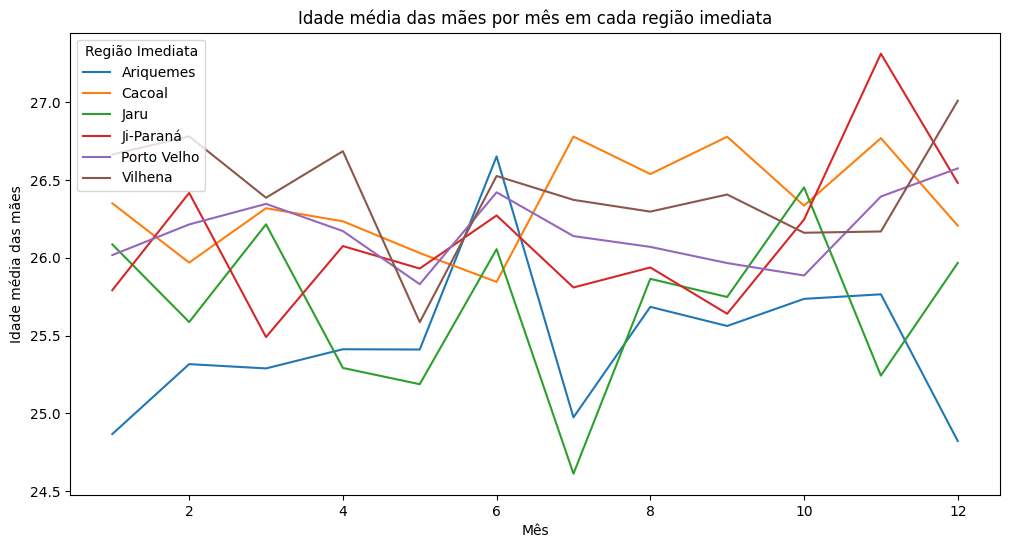

In [122]:
reg_imediatas = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']].copy()
reg_imediatas['REGIAO_IMEDIATA'] = reg_imediatas.index.map(imediatas)
reg_imediatas['DTNASC'] = pd.to_datetime(reg_imediatas['DTNASC'])
reg_imediatas.set_index('munResNome', inplace=True)
reg_imediatas['MES'] = reg_imediatas['DTNASC'].dt.month
reg_imediatas['REGIAO_IMEDIATA'] = reg_imediatas.index.map(imediatas)
display(reg_imediatas.drop(columns='REGIAO_IMEDIATA').groupby(imediatas).count())
idade_media = reg_imediatas.groupby(['MES', 'REGIAO_IMEDIATA'])['IDADEMAE'].mean().unstack()
idade_media.plot(figsize = (12, 6))
plt.title('Idade média das mães por mês em cada região imediata')
plt.xlabel('Mês')
plt.ylabel('Idade média das mães')
plt.legend(title='Região Imediata')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [144]:
df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
# regioes_map = dict(zip(df['municipio'], df['regiao']))

In [145]:
idh = df[['municipio', 'idh']].copy()
idh['faixaidh'] = pd.cut(idh['idh'], [0, 0.6, 0.7, 999999], labels=['Baixo', 'Médio', 'Alto'])
display(idh.groupby(['faixaidh'], observed=False).aggregate('count'))
display(idh.sort_values('idh', ascending=False))

,municipio,idh
faixaidh,,
Baixo,9,9
Médio,37,37
Alto,6,6


,municipio,idh,faixaidh
36,Porto Velho,0.736,Alto
51,Vilhena,0.731,Alto
8,Cacoal,0.718,Alto
23,Ji-Paraná,0.714,Alto
34,Pimenta Bueno,0.710,Alto
4,Ariquemes,0.702,Alto
40,Rolim de Moura,0.700,Médio
12,Cerejeiras,0.692,Médio
22,Jaru,0.689,Médio
14,Colorado do Oeste,0.685,Médio


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [151]:
ifdm = df[['municipio', 'ifdm']].copy()
ifdm['faixaifdm'] = pd.cut(ifdm['ifdm'], [0, 0.4, 0.6, 0.8, 999999], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
display(ifdm.groupby(['faixaifdm'], observed=False).aggregate('count'))
display(ifdm.sort_values('ifdm', ascending=False))

,municipio,ifdm
faixaifdm,,
Baixo,0,0
Regular,26,26
Moderado,26,26
Alto,0,0


,municipio,ifdm,faixaifdm
4,Ariquemes,0.7746,Moderado
51,Vilhena,0.7465,Moderado
34,Pimenta Bueno,0.7383,Moderado
36,Porto Velho,0.7257,Moderado
23,Ji-Paraná,0.7117,Moderado
8,Cacoal,0.7111,Moderado
41,Santa Luzia D'Oeste,0.6850,Moderado
40,Rolim de Moura,0.6785,Moderado
13,Chupinguaia,0.6766,Moderado
44,São Miguel do Guaporé,0.6699,Moderado


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [153]:
pib = df[['municipio', 'pib']].copy()
pib['faixapib'] = pd.cut(pib['pib'], [0, 500000, 1000000, 999999999], labels=['Abaixo de 500 mil', 'entre 500 mil e 1 bilhão', 'Acima de 1 bilhão'])
display(pib.groupby(['faixapib'], observed=False).aggregate('count'))
display(pib.sort_values('pib', ascending=False))

,municipio,pib
faixapib,,
Abaixo de 500 mil,35,35
entre 500 mil e 1 bilhão,9,9
Acima de 1 bilhão,8,8


,municipio,pib,faixapib
36,Porto Velho,17912070,Acima de 1 bilhão
23,Ji-Paraná,3783972,Acima de 1 bilhão
51,Vilhena,2831175,Acima de 1 bilhão
4,Ariquemes,2579830,Acima de 1 bilhão
8,Cacoal,2261644,Acima de 1 bilhão
22,Jaru,1500890,Acima de 1 bilhão
40,Rolim de Moura,1283434,Acima de 1 bilhão
34,Pimenta Bueno,1164877,Acima de 1 bilhão
20,Guajará-Mirim,893000,entre 500 mil e 1 bilhão
32,Ouro Preto do Oeste,834000,entre 500 mil e 1 bilhão


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [180]:
print('\nComo analizado nos frames abaixo, os municípios com os maiores IDH também estão entre os municípios com as maiores contagens de partos')
display(idh.sort_values('idh', ascending=False).head(5))
display(sinasc_raw[['munResNome', 'PARIDADE']].groupby('munResNome').count().sort_values('PARIDADE', ascending=False).head(5))


Como analizado nos frames abaixo, os municípios com os maiores IDH também estão entre os municípios com as maiores contagens de partos


,municipio,idh,faixaidh
36,Porto Velho,0.736,Alto
51,Vilhena,0.731,Alto
8,Cacoal,0.718,Alto
23,Ji-Paraná,0.714,Alto
34,Pimenta Bueno,0.710,Alto


,PARIDADE
munResNome,
Porto Velho,8437
Ji-Paraná,2182
Ariquemes,1729
Vilhena,1590
Cacoal,1374
